**시계열 자료.**

<br>

## Todo List (큰 주제로 보면)

<br>

- 연도별 추세 확인? 시각화로. --> X001-2 에서 진행해봄.
- 연도별 자살률 확인?
    - 이 자살률을 나이/세대/성별 로 구분해서 시각화.

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [3]:
# data loading
# df = pd.read_csv('C:\\Users\\user\\Desktop\\todoData\\fixed_suicide_3.csv')
df = pd.read_csv('C:\\Users\\skdbs\\Desktop\\todoData\\fixed_suicide_3.csv')

In [4]:
df.head()

,Unnamed: 0,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,0,Germany,1990,male,75+ years,1516,1717700,88.26,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
1,1,Germany,1990,male,55-74 years,2406,6593100,36.49,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
2,2,Germany,1990,male,35-54 years,3302,11127100,29.68,Germany1990,0.801,"1,764,967,948,917",23546,Silent
3,3,Germany,1990,female,75+ years,1174,3978800,29.51,Germany1990,0.801,"1,764,967,948,917",23546,G.I. Generation
4,4,Germany,1990,male,25-34 years,1488,6721200,22.14,Germany1990,0.801,"1,764,967,948,917",23546,Boomers


In [5]:
# 불필요한 컬럼 삭제
dropList = ['Unnamed: 0', 'country-year']
df = df.drop(columns=dropList)

In [6]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'HDI_for_year', 'gdp_for_year_($)',
       'gdp_per_capita_($)', 'generation'],
      dtype='object')

In [7]:
# index 재설정 은 하면 안될거같다.
# df.set_index('year', inplace=True)

In [8]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,0.801,"1,764,967,948,917",23546,Boomers


In [9]:
# 나라별로 split
GerDF = df[df['country'] == 'Germany']
JapDF = df[df['country'] == 'Japan']
KorDF = df[df['country'] == 'Republic of Korea']

In [10]:
GerDF.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_for_year_($),gdp_per_capita_($),generation
0,Germany,1990,male,75+ years,1516,1717700,88.26,0.801,"1,764,967,948,917",23546,G.I. Generation
1,Germany,1990,male,55-74 years,2406,6593100,36.49,0.801,"1,764,967,948,917",23546,G.I. Generation
2,Germany,1990,male,35-54 years,3302,11127100,29.68,0.801,"1,764,967,948,917",23546,Silent
3,Germany,1990,female,75+ years,1174,3978800,29.51,0.801,"1,764,967,948,917",23546,G.I. Generation
4,Germany,1990,male,25-34 years,1488,6721200,22.14,0.801,"1,764,967,948,917",23546,Boomers


split을 괜히했나 싶기도 하고

In [11]:
corrList = ['suicides_no', 'population', 'suicides/100k pop', 'HDI_for_year', 'gdp_per_capita_($)']
df[corrList].corr()

,suicides_no,population,suicides/100k pop,HDI_for_year,gdp_per_capita_($)
suicides_no,1.000000,0.696447,0.387184,0.151740,0.268703
population,0.696447,1.000000,-0.111540,0.200411,0.430052
suicides/100k pop,0.387184,-0.111540,1.000000,0.072377,-0.035444
HDI_for_year,0.151740,0.200411,0.072377,1.000000,0.798088
gdp_per_capita_($),0.268703,0.430052,-0.035444,0.798088,1.000000


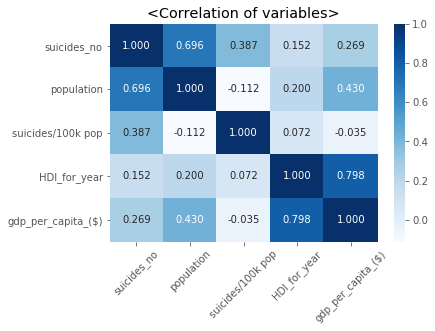

In [12]:
fig = sns.heatmap(data = df[corrList].corr(), annot = True, fmt='.3f', cmap='Blues')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.title('<Correlation of variables>')
plt.show()

***연도별 자살률 확인해야한다***

In [13]:
KorDF['year']

684     1985
685     1985
686     1985
687     1985
688     1985
        ... 
1051    2015
1052    2015
1053    2015
1054    2015
1055    2015
Name: year, Length: 372, dtype: int64

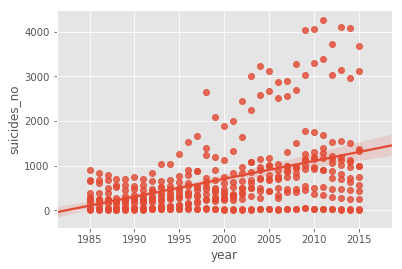

In [14]:
sns.regplot(x=KorDF['year'], y=KorDF['suicides_no'], fit_reg=True)

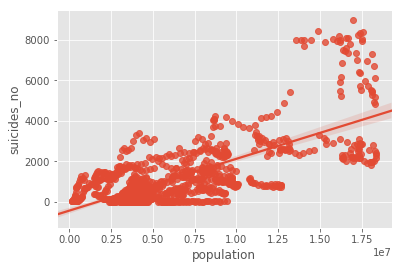

In [15]:
sns.regplot(x=df['population'], y=df['suicides_no'], fit_reg=True)

In [16]:
df['year'].describe # int형이네

<bound method NDFrame.describe of 0       1990
1       1990
2       1990
3       1990
4       1990
        ... 
1051    2015
1052    2015
1053    2015
1054    2015
1055    2015
Name: year, Length: 1056, dtype: int64>

In [17]:
df['year'] = df['year'].astype('string')

In [18]:
df['year'].describe()

count     1056
unique      31
top       2008
freq        36
Name: year, dtype: object

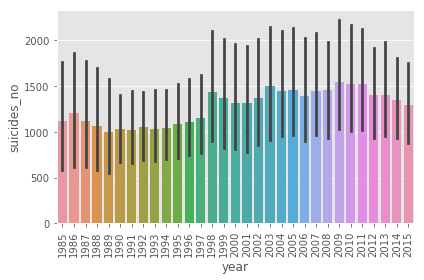

In [19]:
sns.barplot(x=df['year'], y=df['suicides_no'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

***1998~2011년 까지가 높음. 증가하는 추세?***

<br>

***2011년 이후론 감소하는 추세***

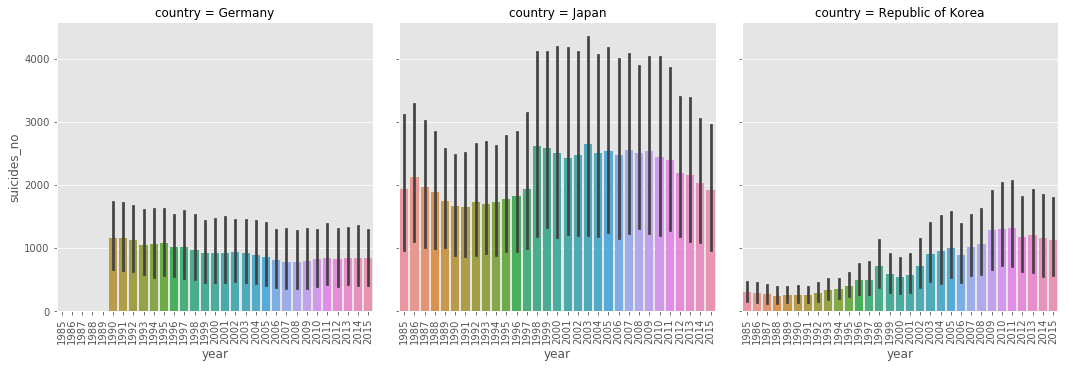

In [27]:
# 나라별로 찢어보자.
# 1행3열.
# sns.catplot 써서 찢어서 내놓을 수 있다고 한다.
allCountry = sns.catplot(kind='bar', data=df, x='year', y='suicides_no', 
                         col='country', col_wrap=3)
allCountry.set_xticklabels(rotation=90) # 모든 그래프 xlabel 회전
# plt.xticks(rotation=90) # 이거로 하면 마지막 xlabel만 회전한다.
plt.show()

- 독일은 꾸준히 감소하는 추세. 
- 일본은 1997년 $\rightarrow$ 1998년 동안 갑작스레 자살률이 많이 증가했음.
    - 2009년까지 비슷한 수준으로 유지되고 있음.
    - 2010년부턴 자살률이 조금씩 줄어드는 것으로 보임.
- 한국도 일본과 마찬가지로 1997년 $\rightarrow$ 1998년에 자살률이 큰폭으로 증가했음.
    - 2011년까지 꾸준히 증가하는 추세.
    - 2012년에 감소, 약간 감소하는 추세를 보임.

 
**일본, 한국은 왜 1998년에 자살률이 갑자기 증가했을까?**

<br>

- **IMF 외환위기**. 1997년 12월에 발발.  

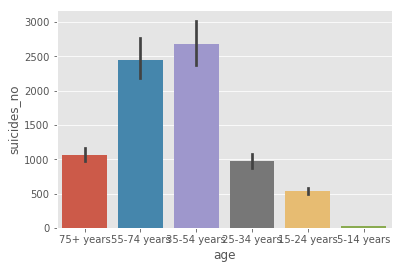

In [23]:
sns.barplot(x=df['age'], y=df['suicides_no'])
plt.show()

***35-54, 55-74세 자살수가 많음.***

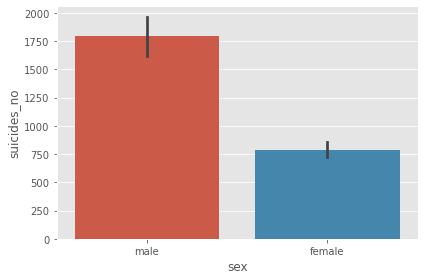

In [37]:
sns.barplot(x=df['sex'], y=df['suicides_no'])
plt.tight_layout()
plt.show()

suicides_no에 큰 영향을 미치는건 population. 인구수.

In [38]:
import statsmodels.api as sm

In [39]:
df['suicides_no']

0       1516
1       2406
2       3302
3       1174
4       1488
        ... 
1051    1372
1052     421
1053     256
1054      17
1055      14
Name: suicides_no, Length: 1056, dtype: int64

In [41]:
df[['suicides_no']]

,suicides_no
0,1516
1,2406
2,3302
3,1174
4,1488
...,...
1051,1372
1052,421
1053,256
1054,17


In [42]:
target = df[['suicides_no']]
x = df[['population']]

In [43]:
model = sm.OLS(target, x)
result = model.fit()

In [44]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            suicides_no   R-squared (uncentered):                   0.675
Model:                            OLS   Adj. R-squared (uncentered):              0.675
Method:                 Least Squares   F-statistic:                              2191.
Date:                Tue, 06 Jul 2021   Prob (F-statistic):                   9.76e-260
Time:                        17:21:23   Log-Likelihood:                         -8959.9
No. Observations:                1056   AIC:                                  1.792e+04
Df Residuals:                    1055   BIC:                                  1.793e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
population     0.0002   4.51e-06     46.810      0.000       0.000       0.000
==============================================================================
Omnibus:                      422.213   Durbin-Watson:                   0.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1760.330
Skew:                           1.884   Prob(JB):                         0.00
Kurtosis:                       8.080   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""